In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nba_api
import seaborn as sns

In [12]:
play_types = [
    "isolation",
    "cut",
    "off_screen",
    "PnR_handler",
    "PnR_roller",
    "post_up",
    "spot_up"
]

In [13]:
output = {}
for play in play_types:
    output[play] = pd.read_csv("Results/" + play + "_labels.csv")

In [14]:
height_weight_data = pd.read_csv("Data/PlayerMeasurements/height_weight.csv")
height_weight_data.drop(height_weight_data.columns.difference(['PLAYER','HEIGHT', "WEIGHT"]), axis=1, inplace=True)

In [15]:
#Join dataframes
for play in play_types:
    output[play] = output[play].merge(height_weight_data, how='left', on="PLAYER")

In [18]:
"""
Isolation clusters
"""

'\nIsolation clusters\n'

In [72]:
play="post_up"
print(output[play][output[play]["LABEL"] == 2]["PLAYER"])

0              Nikola Jokic
1               Joel Embiid
2             Anthony Davis
3         Jaren Jackson Jr.
4        Karl-Anthony Towns
5               Bam Adebayo
7             Pascal Siakam
8             Julius Randle
9            Alperen Sengun
11        Jonas Valanciunas
12    Giannis Antetokounmpo
15             Jusuf Nurkic
16        Victor Wembanyama
17             Zach Collins
18           Nikola Vucevic
19             Bobby Portis
20          Zion Williamson
22             Kevin Durant
24            Deandre Ayton
Name: PLAYER, dtype: object


81.29166666666667
229.79166666666666
79.93333333333334
230.23333333333332
82.78947368421052
254.68421052631578


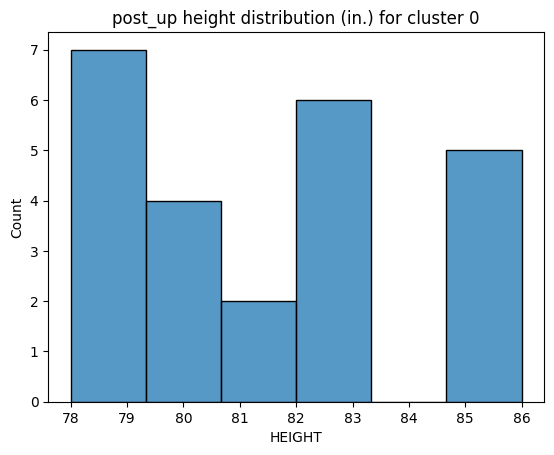

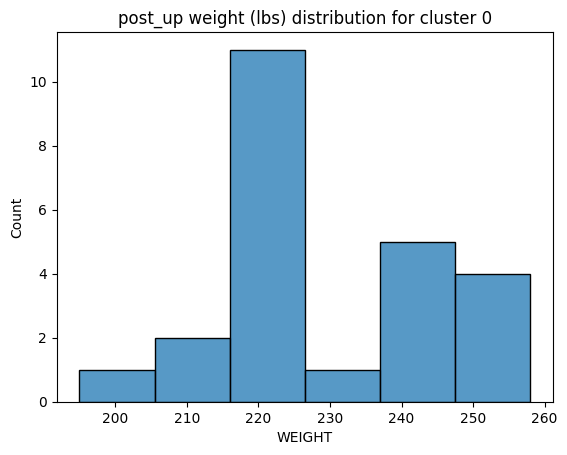

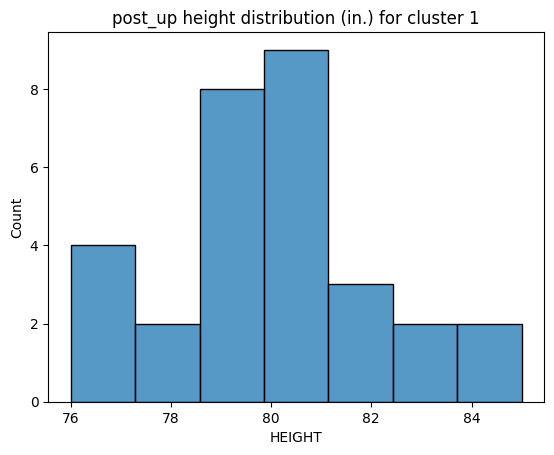

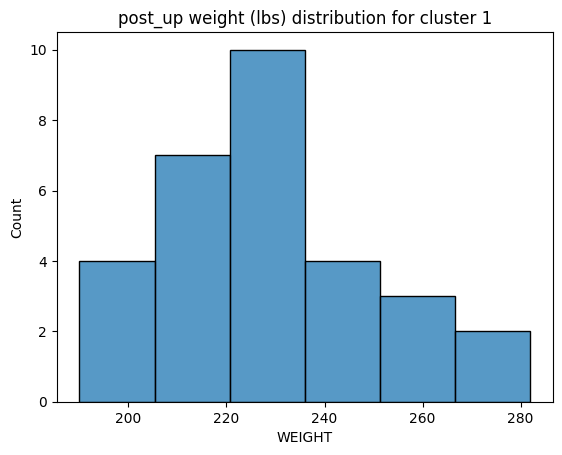

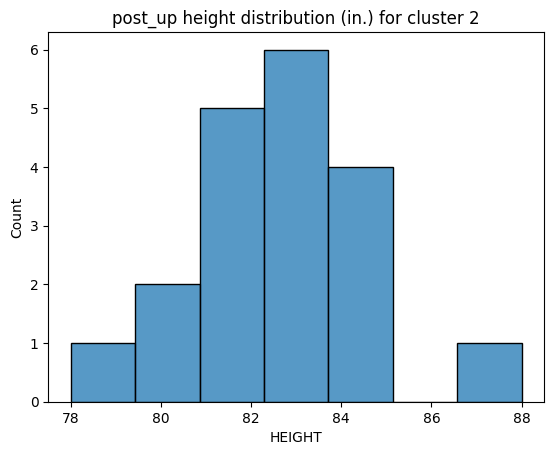

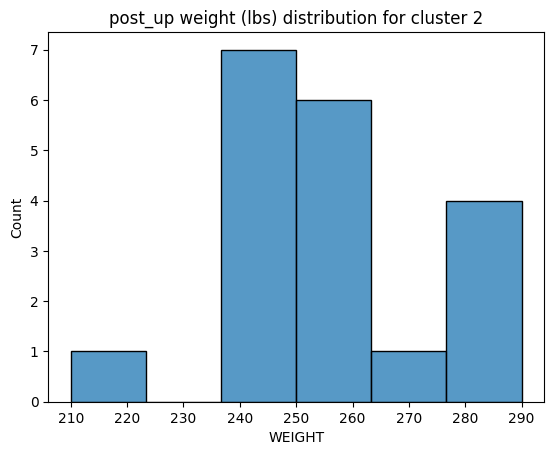

In [73]:
play="post_up"
for cluster in range(len(pd.unique(output[play]["LABEL"]))):
    plt.figure()
    print(np.mean(output[play][output[play]["LABEL"] == cluster]["HEIGHT"]))
    sns.histplot(data=output[play][output[play]["LABEL"] == cluster], x="HEIGHT").set(title=(play + " height distribution (in.) for cluster " + str(cluster)))
    print(np.mean(output[play][output[play]["LABEL"] == cluster]["WEIGHT"]))
    plt.figure()
    sns.histplot(data=output[play][output[play]["LABEL"] == cluster], x="WEIGHT").set(title=(play + " weight (lbs) distribution for cluster " + str(cluster)))
